In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")


In [14]:
train=pd.read_csv("H:/Analytics-Part 2/Loan Predicition/train.csv") 
test=pd.read_csv("H:/Analytics-Part 2/Loan Predicition/test.csv")

In [13]:
train_original=train.copy() 
test_original=test.copy()

In [15]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [18]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
train.shape

(614, 13)

In [21]:
test.shape

(367, 12)

In [22]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [35]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

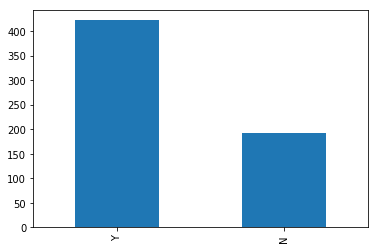

In [34]:
train['Loan_Status'].value_counts().plot.bar()

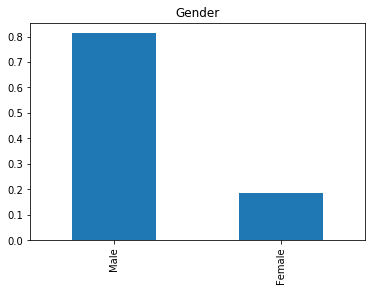

In [29]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender') 
plt.show()

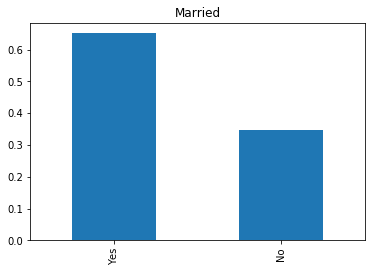

In [31]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.show()

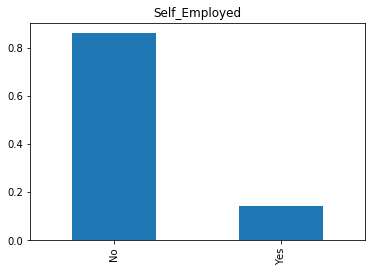

In [32]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.show()

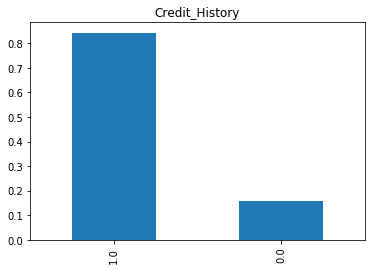

In [33]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

# Visualisation (Independent Variable (Ordinal))

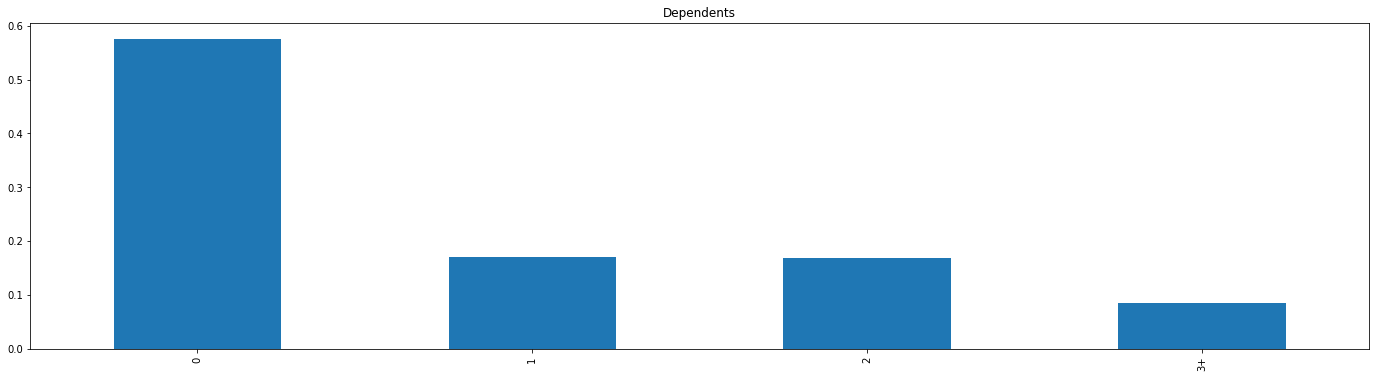

In [36]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.show()

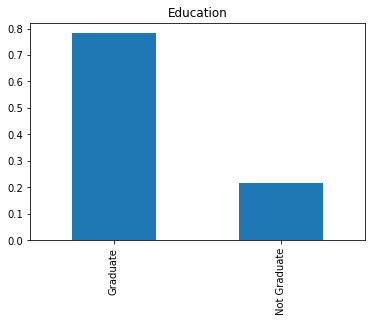

In [37]:
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

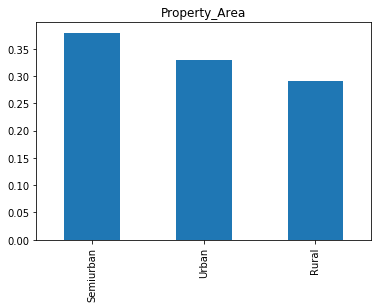

In [38]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

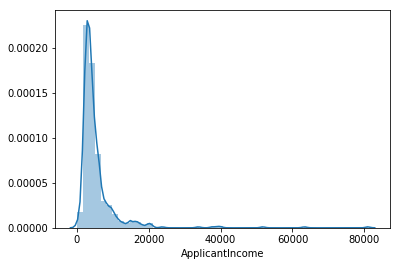

In [41]:
sns.distplot(train['ApplicantIncome']) 

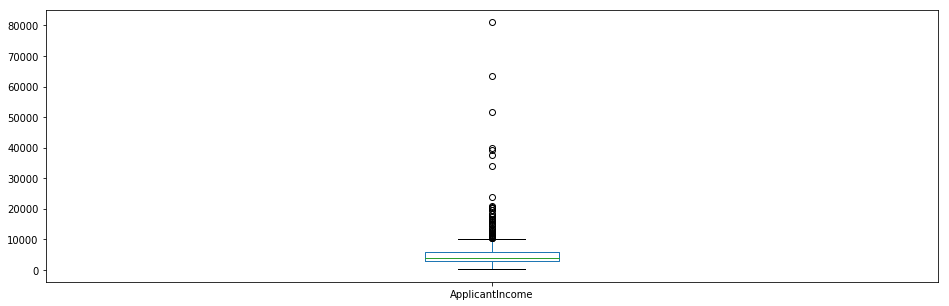

In [42]:
train['ApplicantIncome'].plot.box(figsize=(16,5))

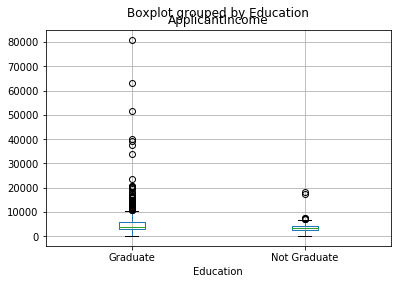

In [44]:
train.boxplot(column='ApplicantIncome', by = 'Education')

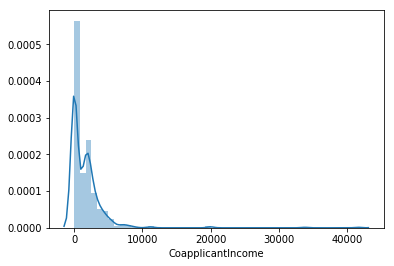

In [45]:
sns.distplot(train['CoapplicantIncome']);

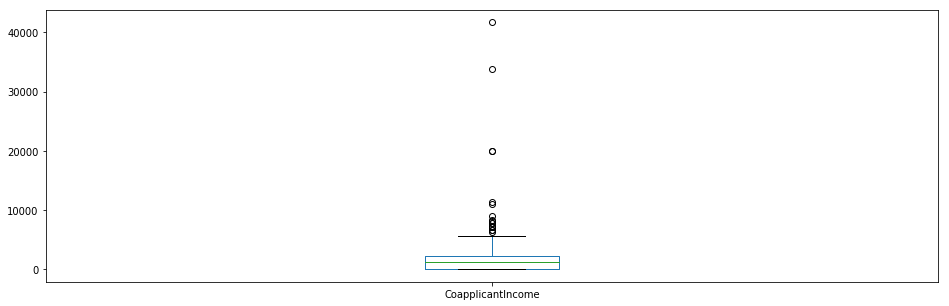

In [46]:
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 

In [49]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 


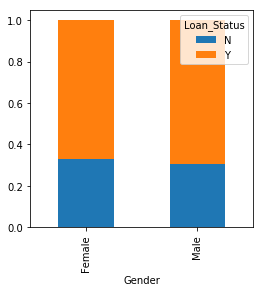

In [50]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [58]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])

In [51]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])

In [52]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])

In [54]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

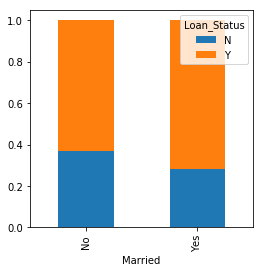

In [59]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

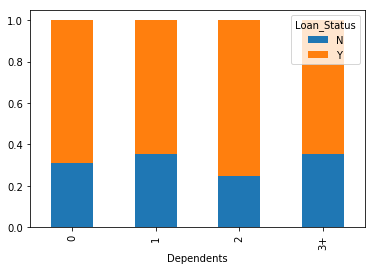

In [61]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 

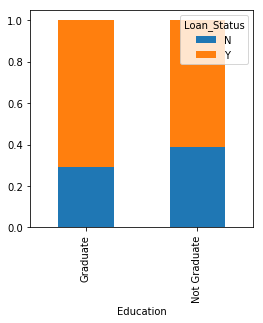

In [62]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 

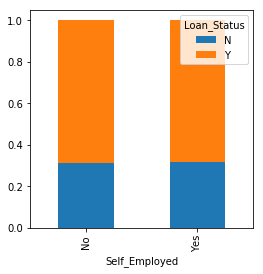

In [63]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

In [64]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])

In [65]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 

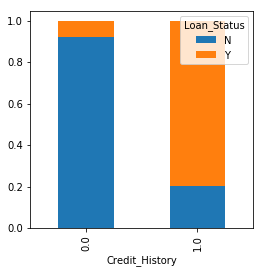

In [66]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

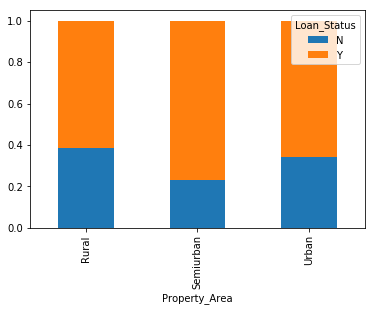

In [67]:
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()


# Numerical Independent variable exploration

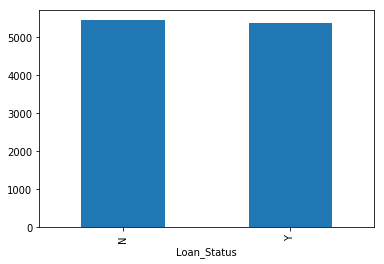

In [71]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

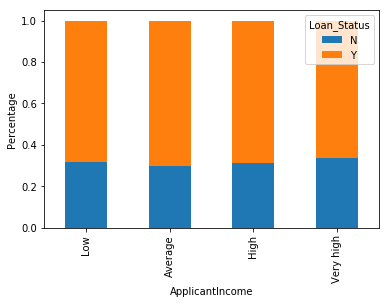

In [75]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

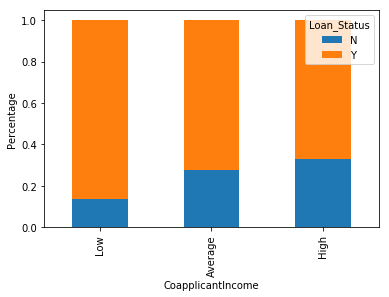

In [76]:
bins=[0,1000,3000,42000]
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

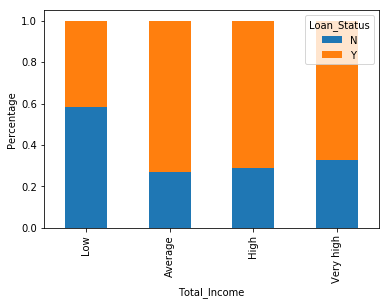

In [78]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

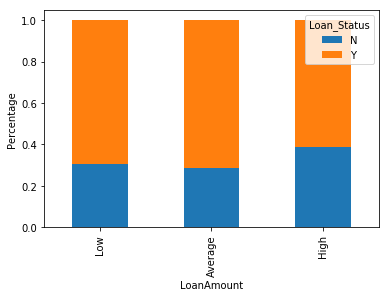

In [79]:
bins=[0,100,200,700] 
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')